# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

* Reduce dimenssionality of the data using PCA


In [0]:
#@title Experiment Walkthrough
#@markdown PCA for IRIS
from IPython.display import HTML
HTML("""<video width='320' height='240' controls> <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Week_1/pca.mp4" type="video/mp4"></video>""")


### Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica
    

### Challenges

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

### Domain Information

Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


##AI/ML Technique

In order to perform dimensionality reduction on Iris datase we use PCA

*   List item
*   List item



**Principal Component Analysis (PCA)**

PCA is linear algebra technique widely used for feature extraction and dimensionality reduction.
PCA helps us identify hidden relationships, similarities or differences, then we can make dimension reduction. However, PCA is the best known and used to reduce the dimensions of dataset. Not only dimensionality reduction we can also perform data compression or feature extraction over the output of it. 

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M1W2E4_PCA-Iris" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing the required packages

In [0]:
# Importing datasets package to load iris dataset 
from sklearn import datasets
from sklearn import model_selection

In [0]:
# Import PCA from sklearn.decomposition to project data from higher dimensions to lower dimensions
from sklearn.decomposition import PCA

In [0]:
# Import linear model to use the SGDClassifier further in the experiment
from sklearn import linear_model

In [0]:
# Use load_iris() to get the data 
# It returns an object of the dataset
data=datasets.load_iris()

In [0]:
# Get data from the dataset object 'data'
dataArr=data.data

In [12]:
#### Let us check the type of the variable 'dataArr'
type(dataArr)

numpy.ndarray

In [13]:
#### Let us check the type of the dataset object 'data'
type(data)

sklearn.utils.Bunch

In [14]:
#### Let us get features present in the dataset from dataset object 'data'
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Split the data into train and test  sets

In [0]:
# Use train_test_split from model_selection to split the data into train and test data
trainData,testData,labelTrain,labelTest=model_selection.train_test_split(dataArr,data.target)

#### Look at the shape of the training and testing sets

In [17]:
# shape will return number of rows and columns in a dataset
trainData.shape,testData.shape, dataArr.shape

((112, 4), (38, 4), (150, 4))

#### Now, reduce the dimensions of data from 4D to 3D using PCA

In [0]:
'''We use PCA technique from decomposition which takes as input
number of components to keep in the lower dimension'''
### We create an object of PCA class
pca=PCA(n_components=3)

In [31]:
#### We are transforming and fitting the data to PCA by using principle components to project the data to lower dimensions 
dataReduced=pca.fit_transform(dataArr)
# Print the first 5 rows of dataframe 'data'
print(dataReduced[:5])

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]]


In [21]:
#### Let us check the type of the variable 'dataReduced'
type(dataReduced)

numpy.ndarray

#### Plot the data after its dimensions are reduced

In [0]:
# Plotting the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

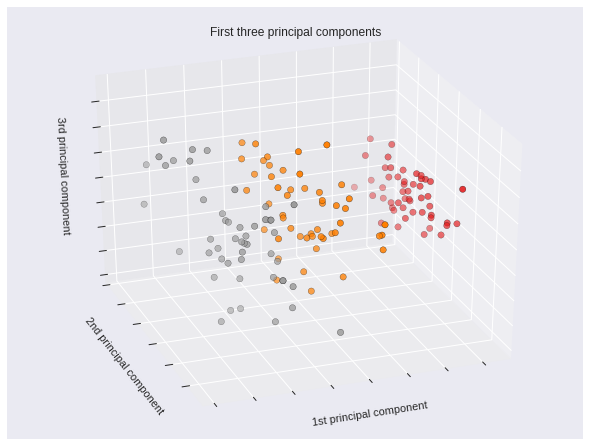

In [23]:
### Create a scatter plot with the reduced data across the 3 principle components
fig= plt.figure(1,figsize=(8,6))
axes=Axes3D(fig, elev=-150, azim=110)
axes.scatter(dataReduced[:, 0], dataReduced[:, 1], dataReduced[:, 2], c=data.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
axes.set_title("First three principal components")
axes.set_xlabel('1st principal component')
axes.set_ylabel('2nd principal component')
axes.set_zlabel('3rd principal component')
axes.set_xticklabels([])
axes.set_yticklabels([])
axes.set_zticklabels([])

plt.show()

#### Now let us try to train various models using the data after its dimensions are reduced

In [0]:
#### Use train_test_split from model_selection to split the reduced data into train and test data
trainDataRed,testDataRed=model_selection.train_test_split(dataReduced)

#### Apply a Linear classifier on the original data

SGDClassifier calculates the gradient of the loss by iterating through each sample of the dataset and is updated with the learning rate .

In [25]:
'''We use SGDClassifier from linear_model which takes as input  
the number of epochs the train data has to go through and
and the stopping criterion for the algorithm i.e when loss reaches this threshhold
''' 
# We create an object of Stochastic Gradient Descent Classifer class
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
# We are fitting the data to SGDClassifier 
clf.fit(trainData,labelTrain)
# Returns the mean accuracy on the given test data and labels
clf.score(testData,labelTest)

0.7631578947368421

#### Apply Linear classifier on the reduced data

In [26]:
# We create an object of Stochastic Gradient Descent Classifer class
clfPCA = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
# We are fitting the reduced data to SGDClassifier 
clfPCA.fit(trainDataRed,labelTrain)
# Returns the mean accuracy on the given reduced test data and labels
clfPCA.score(testDataRed,labelTest)

0.2631578947368421

#### Apply KNN on the original data

In [27]:
'''We use KNeighborsClassifier neighbors from  which takes as input  
the number of epochs the train data has to go through and
and the stopping criterion for the algorithm i.e when loss reaches this threshhold
''' 
from sklearn.neighbors import KNeighborsClassifier
# We create an object of K Nearest Neighbors Classifer class
clf2 = KNeighborsClassifier(n_neighbors=3)
# We are fitting the data to SGDClassifier
clf2.fit(trainData,labelTrain)
# Returns the mean accuracy on the given test data and labels
clf2.score(testData,labelTest)

1.0

#### Apply KNN on reduced data

In [28]:
# We create an object of K Nearest Neighbors Classifer class
clf2PCA = KNeighborsClassifier(n_neighbors=3)
# We are fitting the reduced data to SGDClassifier 
clf2PCA.fit(trainDataRed,labelTrain)
# Returns the mean accuracy on the given reduced test data and labels
clf2PCA.score(testDataRed,labelTest)

0.18421052631578946

#### Please answer the questions below to complete the experiment:

In [0]:
#@title What is the type of covariance matrix of some data set in 4 dimensions a,b,c,d if all the data points a,b,c,d are independent? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "diagonal form" #@param ["upper triangular form", "diagonal form", "lower triangular form"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = " good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2683
Date of submission:  23 Mar 2019
Time of submission:  14:40:11
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
